# Punto 1 - Clasificación de Formas Cuadráticas

## Implementación de clasificador por Valores Propios

In [1]:
import numpy as np
from numpy.linalg import eig

def clasificador_valores_propios(Q: list) -> str:
  clasificador = ""

  # Verificar si la matriz suministrada es simétrica o no
  simetrica = True
  i = 0
  while simetrica and i<len(Q):
    j = 0
    while simetrica and j<len(Q[0]):
      if Q[i][j] != Q[j][i]:
        simetrica = False
      j += 1
    i += 1

  # Si no es simétrica, se simetriza con Qs = (Q+Q^T)/2
  Qs = []
  Q = np.array(Q)
  if not simetrica:
    Qs = (Q + Q.transpose())*1/2
  else:
    Qs = Q

  # Sobre la matriz simétrica, calcular los valores propios
  vp = eig(Qs)
  valores = vp.eigenvalues
  if False not in (valores >= 0):
    clasificador = "Positiva Semidefinida"
  if False not in (valores <= 0):
    clasificador = "Negativa Semidefinida"
  if False not in (valores > 0):
    clasificador = "Positiva Definida"
  if False not in (valores < 0):
    clasificador = "Negativa Definida"
  if clasificador == "":
    clasificador = "Indefinida"

  return clasificador

## Implementación de clasificador por Determinantes Izquierdos Superiores

In [2]:
import numpy as np
from numpy.linalg import det

def clasificador_determinantes(Q: list) -> str:
  clasificador = ""

  # Verificar si la matriz suministrada es simétrica o no
  simetrica = True
  i = 0
  while simetrica and i<len(Q):
    j = 0
    while simetrica and j<len(Q[0]):
      if Q[i][j] != Q[j][i]:
        simetrica = False
      j += 1
    i += 1

  # Si no es simétrica, se simetriza con Qs = (Q+Q^T)/2
  Qs = []
  Q = np.array(Q)
  if not simetrica:
    Qs = (Q + Q.transpose())*1/2
  else:
    Qs = Q

  # Sobre la matriz simétrica, calcular los determinantes
  determinantes = []
  Q_parcial = []
  for i in range(1,len(Qs)+1):
    Q_parcial = Qs[0:i, 0:i]
    determinantes.append(det(Q_parcial))

  # Establecer los casos del clasificador
  impares = []
  pares = []

  if determinantes[-1] == 0:
    # Si acaba en cero, no se incluye en los arreglos
    for i in range(0, len(determinantes[0:-1])):
      if (i+1)%2==1:
        impares.append(determinantes[0:-1][i])
      else:
        pares.append(determinantes[0:-1][i])
    impares = np.array(impares)
    pares = np.array(pares)
    # Al revisar no hay ningún cero porque no está el último
    if False not in (impares < 0) and False not in (pares > 0):
      clasificador = "Negativa Semidefinida"
    elif False not in (impares > 0) and False not in (pares > 0):
      clasificador = "Positiva Semidefinida"
    else:
      clasificador = "Indefinida"
  else:
    # Si no acaba en cero, se incluye en los arreglos
    for i in range(0, len(determinantes)):
      if (i+1)%2==1:
        impares.append(determinantes[i])
      else:
        pares.append(determinantes[i])
    impares = np.array(impares)
    pares = np.array(pares)
    # Al revisar está el último
    if False not in (impares < 0) and False not in (pares > 0):
      clasificador = "Negativa Definida"
    elif False not in (impares > 0) and False not in (pares > 0):
      clasificador = "Positiva Definida"
    else:
      clasificador = "Indefinida"

  return clasificador

## Realización de las pruebas

In [3]:
Q1 = [[1,0],[0,1]]
Q2 = [[1,0],[0,0]]
Q3 = [[-1,0],[0,-1]]
Q4 = [[0,0],[0,-1]]
Q5 = [[1,0],[0,-1]]
Q6 = [[-1,0],[0,1]]

listadoQ = [Q1,Q2,Q3,Q4,Q5,Q6]

# Pruebas de valores propios.
print("Pruebas de Valores Propios")
print("=======================================================")
for matriz in listadoQ:
  print("La matriz " + str(matriz) + " es " + clasificador_valores_propios(matriz))

# Pruebas de determinantes izquierdos superiores
print("\n\nPruebas de Determinantes Izquierdos Superiores")
print("=======================================================")
for matriz in listadoQ:
  print("La matriz " + str(matriz) + " es " + clasificador_determinantes(matriz))

Pruebas de Valores Propios
La matriz [[1, 0], [0, 1]] es Positiva Definida
La matriz [[1, 0], [0, 0]] es Positiva Semidefinida
La matriz [[-1, 0], [0, -1]] es Negativa Definida
La matriz [[0, 0], [0, -1]] es Negativa Semidefinida
La matriz [[1, 0], [0, -1]] es Indefinida
La matriz [[-1, 0], [0, 1]] es Indefinida


Pruebas de Determinantes Izquierdos Superiores
La matriz [[1, 0], [0, 1]] es Positiva Definida
La matriz [[1, 0], [0, 0]] es Positiva Semidefinida
La matriz [[-1, 0], [0, -1]] es Negativa Definida
La matriz [[0, 0], [0, -1]] es Indefinida
La matriz [[1, 0], [0, -1]] es Indefinida
La matriz [[-1, 0], [0, 1]] es Indefinida


## Preguntas

A partir de los resultados de la clasificación, es posible apreciar que los dos métodos coinciden en la mayoría de los casos. Sin embargo, ocurre una diferencia en $Q_4$ la cual, según los valores propios es Negativa Semidefinida (pues estos son $\lambda_1 = -1$ y $\lambda_2 = 0$). Sin embargo, el método de determinantes arroja que es Indefinida porque ambos son cero ($\Delta_1 = 0$ y $\Delta_2 = 0$). Por ende, sería necesario corroborar de una tercera forma pues está correctamente clasificado con ambos métodos.

\
A partir de esto, se verificó en WolframAlpha y efectivamente arroja que es Negativa Semidefinda, por la condición de los valores propios. Es decir, las condiciones presentadas para hacer la prueba de los determinantes superiores no son correctas probablemente pues $\Delta_1 = 0$ no satisface ser estrictamente menor que cero. En consecuencia, el programa no lo reconoce como Negativa Semidefinida.
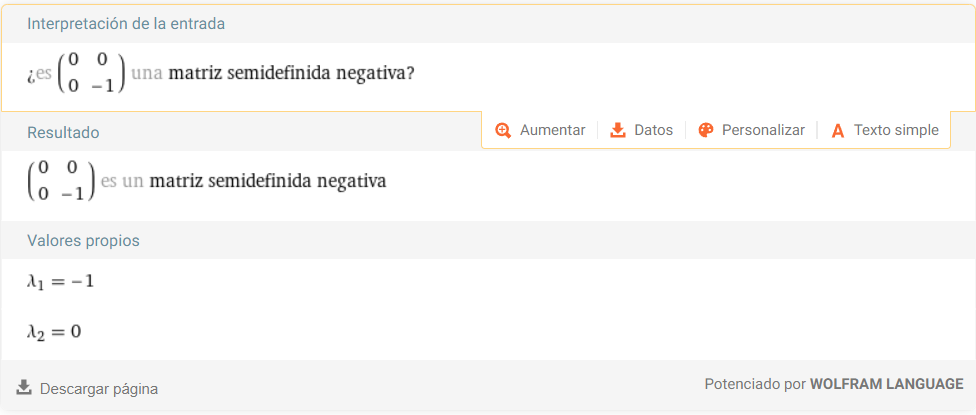

\
Según la siguiente referencia https://moodle2.units.it/pluginfile.php/67237/mod_resource/content/0/quadratic%20form.pdf, para probar que es semidefinida para los casos positivo y negativo, se debe recurrir a las menores principales. Para el caso de esa matriz, hay dos de primer orden $\Delta_1 = \{0, -1\}$ correspondientes a eliminar las filas y columnas correspondientes (es decir, la 11 y la 22). Ambas son menores o iguales que cero para $i=1$ impar. Luego, hay sólo una de segundo orden $\Delta_2 = 0$ que corresponde a $|Q_4|$, por lo que cumple que para $i=2$ par, los determinantes de los menores principales sean mayor o igual que cero.

\
Bajo ese criterio, la clasificación de $Q_4$ coincide con el método de los valores propios. Además, si se extiende a la otra matriz clasificada como Semidefinida, que es $Q_2$ positiva semidefinida, se obtienen $\Delta_1 = \{1,0\}$ y $\Delta_2 = 0$ que cumplen ser todos positivos (como indica el artículo referenciado). Así, la clasificación sería efectivamente Positiva Semidefinida. Dejamos el registro de esta observación sobre el método de prueba de los determinantes superiores izquierdos, pues así como está planteado, genera un error para $Q_4$.

# Punto 2 - Interpretación geométrica de formas cuadráticas:

1. Obtención de los vectores propios normalizados y sus respectivos valores propios de la matriz $Q$.

In [ ]:
import numpy as np

def vectores_valores_propios(matriz:list) -> list:
    # Calcular los valores y vectores propios
    valores_propios, vectores_propios = np.linalg.eig(matriz)
    # Normalizar los vectores propios
    vectores_propios_normalizados = vectores_propios / np.linalg.norm(vectores_propios, axis=0)

    return valores_propios, vectores_propios_normalizados


print("Valores y vectores propios")
print("=======================================================")
for matriz in listadoQ:
  print("La matriz " + str(matriz) + " tiene valores y vectores propios: ")
  print(vectores_valores_propios(matriz))



Valores y vectores propios
La matriz [[1, 0], [0, 1]] tiene valores y vectores propios: 
(array([1., 1.]), array([[1., 0.],
       [0., 1.]]))
La matriz [[1, 0], [0, 0]] tiene valores y vectores propios: 
(array([1., 0.]), array([[1., 0.],
       [0., 1.]]))
La matriz [[-1, 0], [0, -1]] tiene valores y vectores propios: 
(array([-1., -1.]), array([[1., 0.],
       [0., 1.]]))
La matriz [[0, 0], [0, -1]] tiene valores y vectores propios: 
(array([ 0., -1.]), array([[1., 0.],
       [0., 1.]]))
La matriz [[1, 0], [0, -1]] tiene valores y vectores propios: 
(array([ 1., -1.]), array([[1., 0.],
       [0., 1.]]))
La matriz [[-1, 0], [0, 1]] tiene valores y vectores propios: 
(array([-1.,  1.]), array([[1., 0.],
       [0., 1.]]))


2. Gráfico de las curvas de contorno detallando los vectores propios de la matriz $Q$.

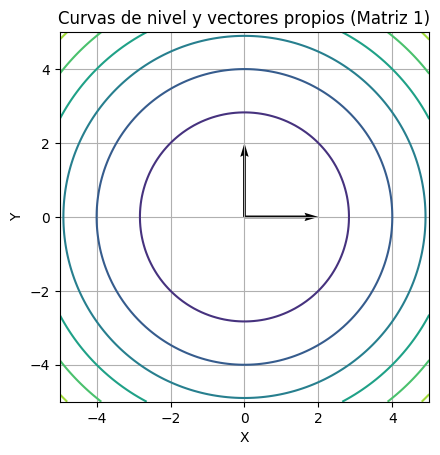

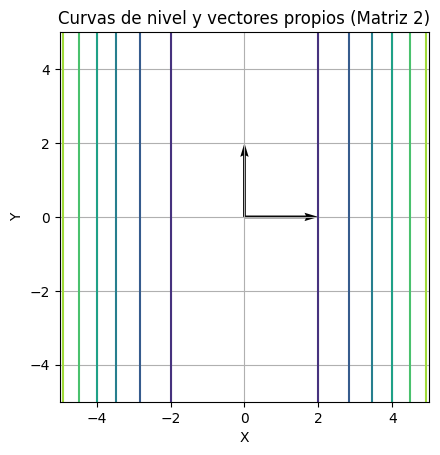

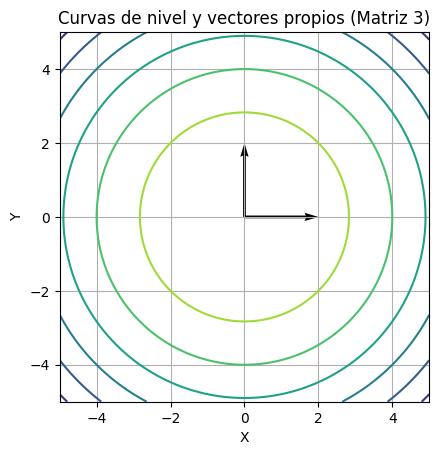

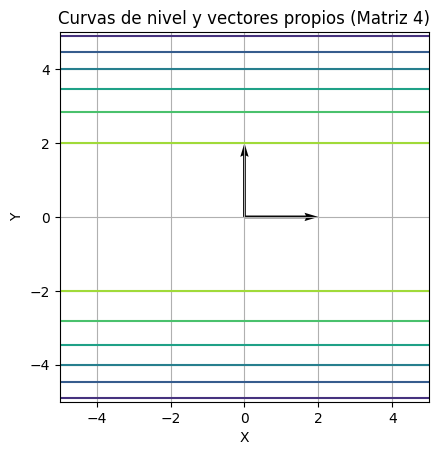

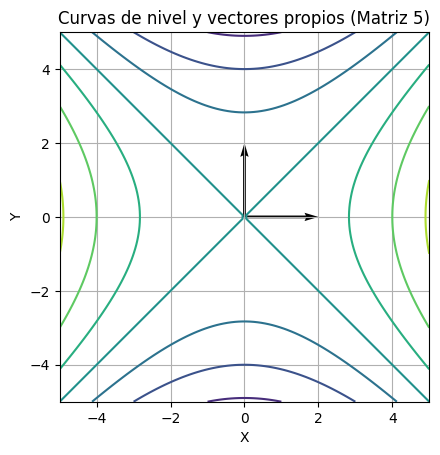

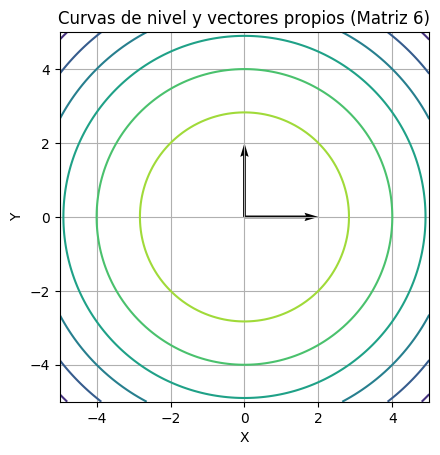

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_curvas_y_vectores(matrices):
    for idx, A in enumerate(matrices, start=1):
        # Calcular los valores y vectores propios
        valores_propios, vectores_propios = np.linalg.eig(A)

        # Normalizar los vectores propios
        vectores_propios_normalizados = vectores_propios / np.linalg.norm(vectores_propios, axis=0)

        # Definir la función a graficar
        def funcion(x, y):
            return A[0,0]*x**2 + (A[0,1] + A[1,0])*x*y + A[1,1]*y**2

        # Crear una cuadrícula de puntos
        x = np.linspace(-5, 5, 100)
        y = np.linspace(-5, 5, 100)
        X, Y = np.meshgrid(x, y)

        # Evaluar la función en los puntos de la cuadrícula
        Z = funcion(X, Y)

        # Crear una nueva figura para cada matriz
        plt.figure(idx)

        # Graficar todas las curvas de nivel
        plt.contour(X, Y, Z, cmap='viridis')

        # Graficar los vectores propios normalizados
        origin = [0], [0]
        for vector in vectores_propios_normalizados.T:
            plt.quiver(*origin, vector[0], vector[1], scale=5)

        # Configuración de la gráfica
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Curvas de nivel y vectores propios (Matriz {idx})')
        plt.grid(True)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
A = np.array([[1,0],[0,0]])

Q1 = np.array([[1,0],[0,1]])
Q2 = (A + A.transpose())*1/2
Q3 = np.array([[-1,0],[0,-1]])
Q4 = np.array([[0,0],[0,-1]])
Q5 = np.array([[1,0],[0,-1]])
Q6 = np.array([[-1,0],[0,-1]])

listadoQ = [Q1,Q2,Q3,Q4,Q5,Q6]

plot_curvas_y_vectores(listadoQ)


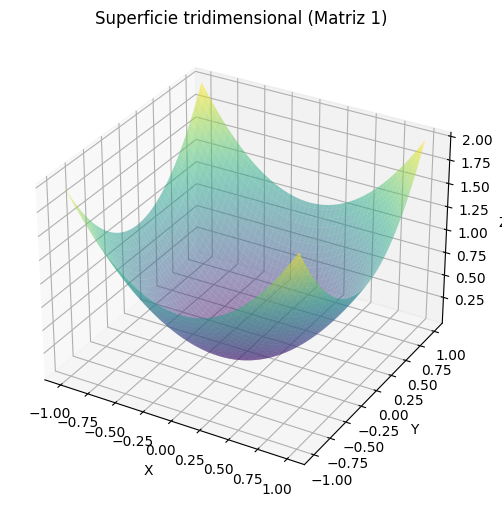

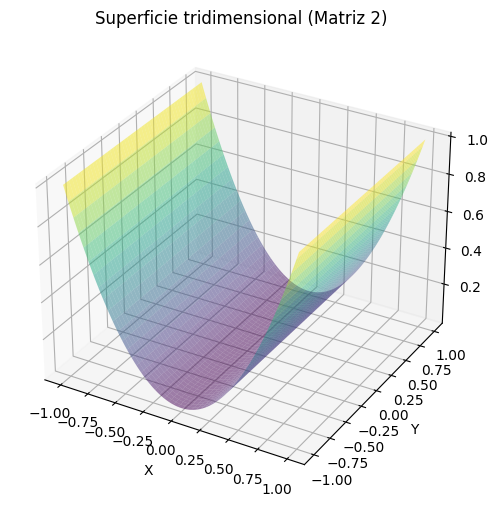

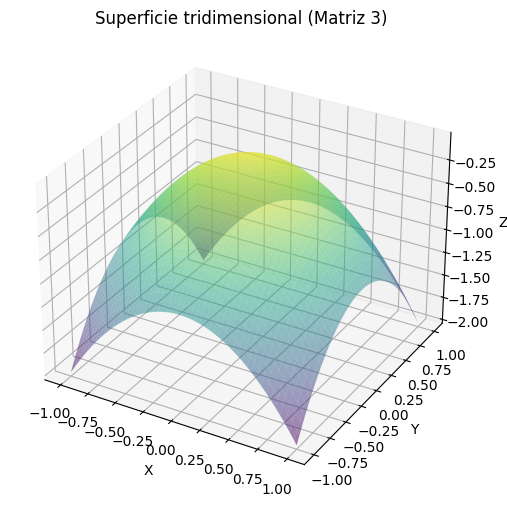

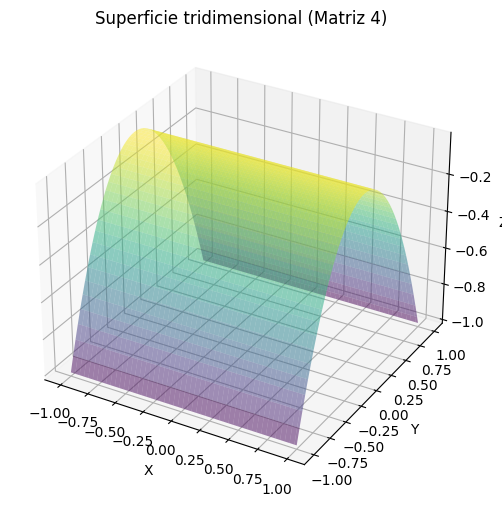

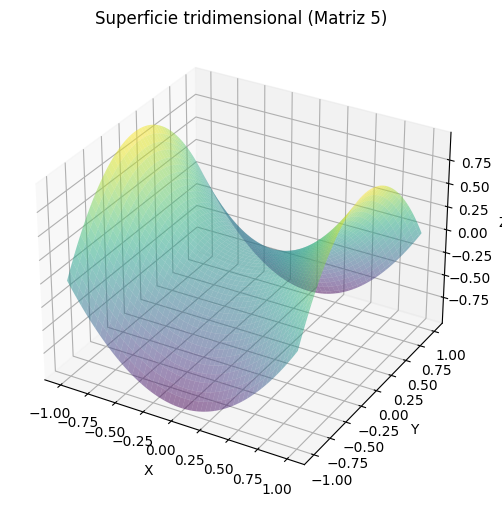

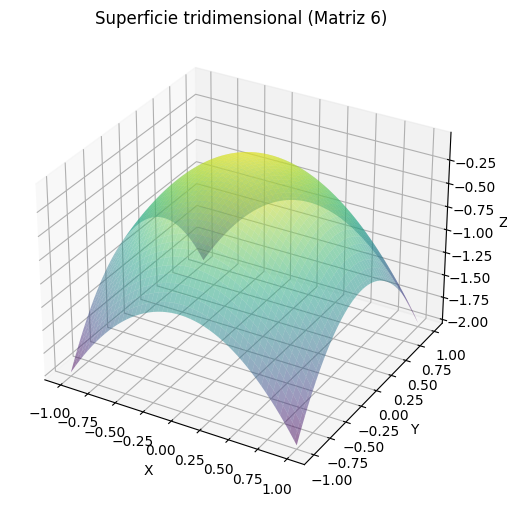

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_surface_func(matrices):
    for idx, A in enumerate(matrices, start=1):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Definir la función a graficar
        def funcion(x, y):
            return A[0,0]*x**2 + (A[0,1] + A[1,0])*x*y + A[1,1]*y**2

        # Crear una cuadrícula de puntos
        x = np.linspace(-1, 1, 100)
        y = np.linspace(-1, 1, 100)
        X, Y = np.meshgrid(x, y)
        Z = funcion(X, Y)

        # Graficar la superficie
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

        # Configuración de la gráfica
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'Superficie tridimensional (Matriz {idx})')
        ax.grid(True)
        plt.show()


Q1 = np.array([[1,0],[0,1]])
Q2 = np.array([[1,0],[0,0]])
Q3 = np.array([[-1,0],[0,-1]])
Q4 = np.array([[0,0],[0,-1]])
Q5 = np.array([[1,0],[0,-1]])
Q6 = np.array([[-1,0],[0,-1]])

listadoQ = [Q1,Q2,Q3,Q4,Q5,Q6]

plot_surface_func(listadoQ)


## Preguntas

1. ¿Cómo se relacionan los valores y vectores propios con las gráficas que obtuvo?

Los valores propios se relacionan con el radio de las curvas de nivel de la función. En cambio, los vectores propios determinan la orientación de estas.

2. ¿Cuál es la orientación de los ejes?, ¿Cuál es la longitud de los ejes?, ¿Los resultados son consistentes con las clasificaciones obtenidas en el punto 1?

Como se menciono anteriormente, la orientación de los ejes esta relacinada con los vectores propios de la matriz $Q$ de cada función $f(x)$. La longitud de los ejes, se relaciona con los valores propios; sin embargo, para la mayoria de nuestras funciones las curvas de nivel corresponden a circulos (es decir, que los valores propios eran iguales). Vale destacar que, en los casos donde alguno de los valores propios es cero se trataba de un paraboloide hiperbolico. En otras palabaras, las curvas de nivel no formaban una curva cerrada. Finalmente, se comprobo que los resultados desde los valores y vectores propios hasta las curvas de nivel son consistentes con la función vista tridimensionalmente.
